# Instructions from blackboard:

Browse to https://www.kaggle.com/c/morebikes2020/overview for the coursework assignment. You may work alone or in a pair, as you prefer.

A report on your approach and results is due on Wednesday 13th of January 2021 (common deadline for all CDT-only coursework). A BB submission link will follow. 


# Task description on Kaggle: https://www.kaggle.com/c/morebikes2020/

The goal in this assignment is to predict the number of available bicycles in all rental stations 3 hours in advance. There are at least two use cases for such predictions. First, a user plans to rent (or return) a bike in 3 hours' time and wants to choose a bike station which is not empty (or full). Second, the company wants to avoid situations where a station is empty or full and therefore needs to move bikes between stations. For this purpose, they need to know which stations are more likely to be empty or full soon.


The assignment will be organised by 3 phases. During each phase you will be given a particular task. You can earn different proportions of the marks by finishing these phases step by step.
## Phase 1:

In this phase, you will be given the data of 75 stations (Station 201 to Station 275) for the period of one month. The task is to predict availability for each station for the next 3 months.

There are two approaches for this task:

* Train a separate model for each station.
* Train a single model on all stations together.

Implement your models based on both approaches and check which approach is better. Investigate and discuss the results.

(The training data is given by Train.zip, the test data is given by test.csv).

(Build your models and submit the predictions according to the format given by example_leaderboard_submission.csv).
## Phase 2:

Now you will be given a set of linear models trained on other stations (Station 1 to Station 200) with the training data from a whole year. Although these models are not trained on the stations to be predicted, they can still be used since there should be some similarity among different stations. To successfully use these models can help reuse the knowledge learned from a whole year's data.


The task then is to figure out how to predict the stations in Phase 1 by only using these trained models. Investigate the resulting performances and compare to your own classifiers in Phase 1.

(The pre-trained linear models are given by Models.zip).
## Phase 3:

Try to achieve an even better performance by designing a approach to combine your own models with the given linear models.

# Evaluation

The predictions are evaluated according to the mean absolute error (MAE) between the predicted and true values. The winner is the participant who submitted the predictions with the lowest mean absolute error.

# Data

## File descriptions

    Train.zip - the training set, unzip this and you will get the csv file for each station.
    test.csv - the test set.
    sampleSubmission.csv - a sample submission file in the correct format
    Models.zip - linear models pre-trained from other stations.

## Data fields

The data contain 4 station features, 8 time features, 7 weather features, 1 task-specific feature and 4 profile features plus 1 target variable. The target variable is 'bikes' and it is a non-negative integer representing the median number of available bikes during the respective hour in the respective rental station. There are 4 features regarding the station:

    station - integer from 1 to 275, representing the number of the station, also in the file name
    latitude - real number representing geographical latitude of the station
    longitude - real number representing geographical longitude of the station
    numDocks - positive integer representing the maximal number of bikes that can be present in the station


There are 8 features regarding the timepoint:

    timestamp - integer representing the Unix timestamp (seconds since Unix Epoch)
    year - integer with 4 digits
    month - integer from 1 (January) to 12 (December)
    day - integer from 1 to 31
    hour - integer from 0 to 23
    weekday - string (Monday, Tuesday, ..., Sunday)
    weekhour - integer from 1 to 168 representing the hour of the week (Monday 0h is weekhour 1, Sunday 23h is weekhour 168)
    isHoliday - 1 (a national or local holiday), 0 (not a holiday)


There are 7 features regarding weather, these do not differ across stations:

    windMaxSpeed.m.s
    windMeanSpeed.m.s
    windDirection.grades
    temperature.C
    relHumidity.HR
    airPressure.mb
    precipitation.l.m2


There is one feature regarding the number of bikes in the station 3 hours ago:

    bikes_3h_ago

The profile variables are calculated from earlier available timepoints on the same station:

    The 'full_profile_bikes' feature is the arithmetic average of the target variable 'bikes' during all past timepoints with the same weekhour, in the same station.
    The 'full_profile_3h_diff_bikes' feature is the arithmetic average of the calculated feature 'bikes-bikes_3h_ago' during all past timepoints with the same weekhour, in the same station.
    The 'short_*' profile s the same as the full profiles except that it only uses past 4 timepoints with the same weekhour. If there are less than 4 such timepoints then all are used. The missing values are ignored in all profile calculations, i.e. only the timepoints with existing values are averaged.

## MODELS

All models are presented in the CSV format. 

For each station there are 6 linear models, all built using R function rlm from the package MASS, with missing value imputation using function na.roughfix from package randomForest. The models use the following features (plus an intercept term):

    short: bikes_3h_ago, short_profile_3h_diff_bikes, short_profile_bikes
    short_temp: bikes_3h_ago, short_profile_3h_diff_bikes, short_profile_bikes, temperature.C
    full: bikes_3h_ago, full_profile_3h_diff_bikes, full_profile_bikes
    full_temp: bikes_3h_ago, full_profile_3h_diff_bikes, full_profile_bikes, temperature.C
    short_full: bikes_3h_ago, short_profile_3h_diff_bikes, short_profile_bikes, full_profile_3h_diff_bikes, full_profile_bikes
    short_full_temp: bikes_3h_ago, short_profile_3h_diff_bikes, short_profile_bikes, full_profile_3h_diff_bikes, full_profile_bikes, temperature.C


In [15]:
import glob
import os
import pandas as pd

all_files = all_files = glob.glob(os.path.join('morebikes2020/Train/Train', '*.csv'))
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

In [23]:
df.head()

,station,latitude,longitude,numDocks,timestamp,year,month,day,hour,weekday,...,temperature.C,relHumidity.HR,airPressure.mb,precipitation.l.m2,bikes_3h_ago,full_profile_3h_diff_bikes,full_profile_bikes,short_profile_3h_diff_bikes,short_profile_bikes,bikes
0,245,39.48143,-0.393436,20,1.412114e+09,2014,10,1,0,Wednesday,...,21.3,85.0,855.3,0.0,NaN,NaN,NaN,NaN,NaN,1.0
1,245,39.48143,-0.393436,20,1.412118e+09,2014,10,1,1,Wednesday,...,21.1,86.0,1000.6,0.0,NaN,NaN,NaN,NaN,NaN,1.0
2,245,39.48143,-0.393436,20,1.412122e+09,2014,10,1,2,Wednesday,...,20.9,86.0,880.6,0.0,NaN,NaN,NaN,NaN,NaN,2.0
3,245,39.48143,-0.393436,20,1.412125e+09,2014,10,1,3,Wednesday,...,20.4,88.0,859.8,0.0,1.0,NaN,NaN,NaN,NaN,3.0
4,245,39.48143,-0.393436,20,1.412129e+09,2014,10,1,4,Wednesday,...,20.3,87.0,898.1,0.0,1.0,NaN,NaN,NaN,NaN,3.0


In [25]:
df.describe()

,station,latitude,longitude,numDocks,timestamp,year,month,day,hour,weekhour,...,temperature.C,relHumidity.HR,airPressure.mb,precipitation.l.m2,bikes_3h_ago,full_profile_3h_diff_bikes,full_profile_bikes,short_profile_3h_diff_bikes,short_profile_bikes,bikes
count,55875.000000,55875.000000,55875.000000,55875.000000,5.587500e+04,55875.0,55875.0,55875.000000,55875.000000,55875.000000,...,55800.000000,55800.000000,55800.000000,55800.0,55575.000000,43050.000000,43275.000000,43050.000000,43275.000000,55800.000000
mean,238.000000,39.471010,-0.372940,19.560000,1.413454e+09,2014.0,10.0,16.013423,11.487248,84.583893,...,21.707796,65.943548,1002.257258,0.0,7.437607,0.002956,7.412268,0.002956,7.412268,7.442186
std,21.648904,0.013061,0.023094,5.702074,7.742329e+05,0.0,0.0,8.945842,6.926340,46.566917,...,3.271253,16.724256,42.523692,0.0,6.542969,4.686462,5.957532,4.686462,5.957532,6.541292
min,201.000000,39.444093,-0.409316,14.000000,1.412114e+09,2014.0,10.0,1.000000,0.000000,1.000000,...,13.900000,18.000000,811.900000,0.0,0.000000,-39.000000,0.000000,-39.000000,0.000000,0.000000
25%,219.000000,39.462808,-0.393181,15.000000,1.412784e+09,2014.0,10.0,8.000000,5.000000,47.000000,...,19.400000,54.000000,1009.675000,0.0,2.000000,-1.666667,2.750000,-1.666667,2.750000,2.000000
50%,238.000000,39.469844,-0.375973,20.000000,1.413454e+09,2014.0,10.0,16.000000,11.000000,85.000000,...,21.350000,68.000000,1015.350000,0.0,6.000000,0.000000,6.000000,0.000000,6.000000,6.000000
75%,257.000000,39.480591,-0.354640,20.000000,1.414123e+09,2014.0,10.0,24.000000,17.000000,122.000000,...,23.400000,81.000000,1021.500000,0.0,12.000000,1.666667,11.000000,1.666667,11.000000,12.000000
max,275.000000,39.495034,-0.328902,40.000000,1.414793e+09,2014.0,10.0,31.000000,23.000000,168.000000,...,34.600000,91.000000,1084.900000,0.0,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000


# Ideas

Bike usage and location is likely to be heavily influenced by commuters during weekdays (particularly around 9am and 5pm as commuters move bikes from suburbs to central offices) and leisure use on weekends. Therefore I would expect number of bikes in a station to be similar to number of bikes in the station at the same time on the same day of the week in the past.

I would expect bike usage to be influenced by weather: it's not much fun cycling in the wind and rain, cold is less of an issue but maybe when it's very hot or very humid usage might descrease (particularly for commuting times when riders may not wish to get too hot and sweaty on their way to an important meeting at work).

I would expect bike usage to decrease during the winter (indepently of poorer weather) due to dislike of cycling in the dark. 

The training data is from Valencia in Spain. For stations 201-275 we have it for October 2014.

The test data (again from the same stations 201-275) is from November 2014, December 2014 and January 2015 so for first part we do not need to worry about seasonal effects too much (all in winter). However, I would expect a dip in usage around Christmas and New Year.

## Assumptions

* Closed system - bike taken from one station to another and no new bikes added and no bikes removed (expect that they are in use)
* Some intervention by someone to move bikes around other than just users.

## Simple baselines

* No change from previous hour
* No change from 3 hours ago
* Use one of the smoothed estimates which in themselves build in a simple model expecting usage to be dependent on the hour of the week (ie should pick up some of the different weekday and weekend fluctuations)

In [26]:
test_data = pd.read_csv('morebikes2020/test.csv')

In [44]:
test_data.describe()

,Id,station,latitude,longitude,numDocks,timestamp,year,month,day,hour,...,windDirection.grades,temperature.C,relHumidity.HR,airPressure.mb,precipitation.l.m2,bikes_3h_ago,full_profile_3h_diff_bikes,full_profile_bikes,short_profile_3h_diff_bikes,short_profile_bikes
count,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2.250000e+03,2250.000000,2250.000000,2250.000000,2250.000000,...,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000
mean,1125.500000,238.000000,39.471010,-0.372940,19.560000,1.418770e+09,2014.334667,7.997333,15.765333,11.767111,...,181.716800,12.926578,64.204889,1010.362089,0.008622,7.759556,0.073909,7.597906,0.009852,7.773815
std,649.663374,21.653523,0.013064,0.023099,5.703291,2.247053e+06,0.471979,4.980531,8.691749,6.943460,...,67.840312,4.084343,17.402368,17.065828,0.092475,6.218881,3.903431,5.044116,3.766784,5.176288
min,1.000000,201.000000,39.444093,-0.409316,14.000000,1.414807e+09,2014.000000,1.000000,1.000000,0.000000,...,0.000000,3.100000,17.000000,896.900000,0.000000,0.000000,-30.300000,0.000000,-27.500000,0.000000
25%,563.250000,219.000000,39.462808,-0.393181,15.000000,1.416823e+09,2014.000000,1.000000,8.000000,6.000000,...,157.500000,9.900000,50.000000,1005.700000,0.000000,2.000000,-1.250000,4.000000,-1.250000,3.750000
50%,1125.500000,238.000000,39.469844,-0.375973,20.000000,1.418774e+09,2014.000000,11.000000,16.000000,12.000000,...,180.000000,12.900000,65.000000,1013.550000,0.000000,7.000000,0.087121,6.639610,0.000000,7.000000
75%,1687.750000,257.000000,39.480591,-0.354640,20.000000,1.420697e+09,2015.000000,12.000000,23.000000,18.000000,...,225.000000,15.975000,79.000000,1021.500000,0.000000,12.000000,1.298529,10.142857,1.250000,10.750000
max,2250.000000,275.000000,39.495034,-0.328902,40.000000,1.422738e+09,2015.000000,12.000000,31.000000,23.000000,...,337.500000,25.000000,97.000000,1033.600000,2.600000,37.000000,35.285714,39.571429,34.250000,39.750000


<AxesSubplot:xlabel='hour'>

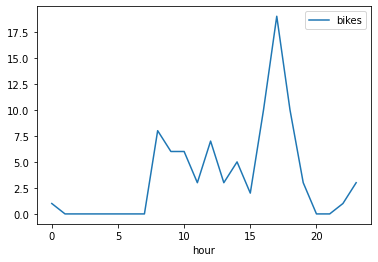

In [55]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

df[(df['station']==201) & (df['day']==1)].plot('hour', 'bikes', ax=ax)

(-0.40931619469999997, -0.3289019589, 39.4440930091, 39.4950341762)


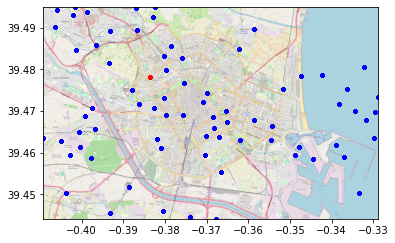

In [69]:
fig, ax = plt.subplots()

BBox = (df.longitude.min(),   df.longitude.max(),      
         df.latitude.min(), df.latitude.max())

print(BBox)

val_map = plt.imread('map.png')

ax.scatter(df.longitude, df.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.scatter(df[df['station']==201].longitude, df[df['station']==201].latitude, zorder=2, alpha= 0.2, c='r', s=10)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(val_map, zorder=0, extent = BBox, aspect= 'equal')

<AxesSubplot:title={'center':'total bikes docked'}, xlabel='datetime'>

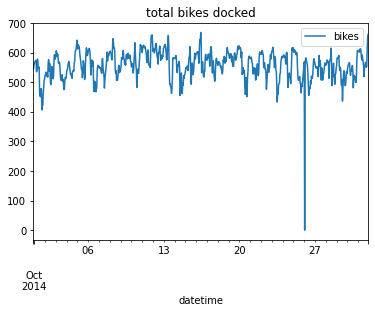

In [89]:
total_docked_bikes = df.groupby('timestamp')['bikes'].sum().reset_index()
total_docked_bikes['datetime'] = total_docked_bikes['timestamp'].values.astype(dtype='datetime64[s]')
total_docked_bikes.plot('datetime', 'bikes', title="total bikes docked")

So doesn't seem unreasonable to assume bikes are not being added or removed from the system (total number docked varies between about 450 and 650 and difference doesn't seem unreasonable number to be in use at busy times).

Of course it does show an oddity on 26th October that might be worth investigating (seemingly no bikes present)

This timestamp corresponds to 2am Sunday 26th October. There are two such rows per station due to the change from summer time (corresponding to timestamps 1414285200 and 1414281600). One of these rows is NaN for weather recordings and number of bikes docked (no doubt due to the some system failure). It is also worth assuming these values will have a knock on effect on the full and short profile and the bikes 3h ago values. Hopefully the full version has sufficient history to deal with this.

In [136]:
df[(df['bikes'] == 0) & (df['day'] == 26)][['hour', 'station', 'bikes']].groupby('hour')['bikes'].sum()

hour
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
Name: bikes, dtype: float64

In [116]:
total_bikes_docked = df.groupby('timestamp')['bikes'].sum().reset_index()

In [119]:
total_bikes_docked[total_bikes_docked['bikes'] == 0].timestamp.min()

1414285200.0

In [122]:
df[df['timestamp'] == 1414285200.0]

,station,latitude,longitude,numDocks,timestamp,year,month,day,hour,weekday,...,temperature.C,relHumidity.HR,airPressure.mb,precipitation.l.m2,bikes_3h_ago,full_profile_3h_diff_bikes,full_profile_bikes,short_profile_3h_diff_bikes,short_profile_bikes,bikes
603,245,39.481430,-0.393436,20,1.414285e+09,2014,10,26,2,Sunday,...,NaN,NaN,NaN,NaN,0.0,0.25,5.75,0.25,5.75,NaN
1348,266,39.492946,-0.401981,15,1.414285e+09,2014,10,26,2,Sunday,...,NaN,NaN,NaN,NaN,5.0,-0.25,5.00,-0.25,5.00,NaN
2093,267,39.462808,-0.405060,20,1.414285e+09,2014,10,26,2,Sunday,...,NaN,NaN,NaN,NaN,1.0,0.25,9.50,0.25,9.50,NaN
2838,232,39.475213,-0.336315,15,1.414285e+09,2014,10,26,2,Sunday,...,NaN,NaN,NaN,NaN,7.0,1.75,6.00,1.75,6.00,NaN
3583,222,39.461261,-0.347921,20,1.414285e+09,2014,10,26,2,Sunday,...,NaN,NaN,NaN,NaN,11.0,4.00,17.25,4.00,17.25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52753,273,39.494136,-0.406020,16,1.414285e+09,2014,10,26,2,Sunday,...,NaN,NaN,NaN,NaN,12.0,1.00,8.25,1.00,8.25,NaN
53498,228,39.475346,-0.351674,20,1.414285e+09,2014,10,26,2,Sunday,...,NaN,NaN,NaN,NaN,6.0,-1.75,14.75,-1.75,14.75,NaN
54243,271,39.463440,-0.409316,20,1.414285e+09,2014,10,26,2,Sunday,...,NaN,NaN,NaN,NaN,2.0,0.50,5.75,0.50,5.75,NaN
54988,248,39.455440,-0.366517,23,1.414285e+09,2014,10,26,2,Sunday,...,NaN,NaN,NaN,NaN,14.0,-0.25,14.00,-0.25,14.00,NaN


In [135]:
pd.set_option('display.max_columns', None)
clocks_changing = df[(df['day']==26) & (df['hour'] == 5)]
clocks_changing

,station,latitude,longitude,numDocks,timestamp,year,month,day,hour,weekday,weekhour,isHoliday,windMaxSpeed.m.s,windMeanSpeed.m.s,windDirection.grades,temperature.C,relHumidity.HR,airPressure.mb,precipitation.l.m2,bikes_3h_ago,full_profile_3h_diff_bikes,full_profile_bikes,short_profile_3h_diff_bikes,short_profile_bikes,bikes
606,245,39.481430,-0.393436,20,1.414296e+09,2014,10,26,5,Sunday,150,0,8.0,3.2,180.0,18.8,49.0,1021.4,0.0,NaN,1.666667,9.333333,1.666667,9.333333,2.0
1351,266,39.492946,-0.401981,15,1.414296e+09,2014,10,26,5,Sunday,150,0,8.0,3.2,180.0,18.8,49.0,1021.4,0.0,NaN,0.000000,5.000000,0.000000,5.000000,6.0
2096,267,39.462808,-0.405060,20,1.414296e+09,2014,10,26,5,Sunday,150,0,8.0,3.2,180.0,18.8,49.0,1021.4,0.0,NaN,0.000000,12.333333,0.000000,12.333333,3.0
2841,232,39.475213,-0.336315,15,1.414296e+09,2014,10,26,5,Sunday,150,0,8.0,3.2,180.0,18.8,49.0,1021.4,0.0,NaN,0.666667,5.000000,0.666667,5.000000,13.0
3586,222,39.461261,-0.347921,20,1.414296e+09,2014,10,26,5,Sunday,150,0,8.0,3.2,180.0,18.8,49.0,1021.4,0.0,NaN,0.666667,18.333333,0.666667,18.333333,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52756,273,39.494136,-0.406020,16,1.414296e+09,2014,10,26,5,Sunday,150,0,8.0,3.2,180.0,18.8,49.0,1021.4,0.0,NaN,-0.666667,6.666667,-0.666667,6.666667,12.0
53501,228,39.475346,-0.351674,20,1.414296e+09,2014,10,26,5,Sunday,150,0,8.0,3.2,180.0,18.8,49.0,1021.4,0.0,NaN,-3.666667,12.333333,-3.666667,12.333333,20.0
54246,271,39.463440,-0.409316,20,1.414296e+09,2014,10,26,5,Sunday,150,0,8.0,3.2,180.0,18.8,49.0,1021.4,0.0,NaN,-0.666667,6.000000,-0.666667,6.000000,4.0
54991,248,39.455440,-0.366517,23,1.414296e+09,2014,10,26,5,Sunday,150,0,8.0,3.2,180.0,18.8,49.0,1021.4,0.0,NaN,2.000000,17.666667,2.000000,17.666667,9.0


In [133]:
clocks_changing.timestamp.min()

1414281600.0

In [134]:
clocks_changing.timestamp.max()

1414285200.0